# Eigenvalues and Eigenvectors: A Visual Introduction

## What does "Eigen" mean?

The word **"eigen"** comes from German and means **"characteristic"** or **"own"**. When we talk about an **eigenproblem**, we're looking for the **characteristic properties** of a linear transformation.

But characteristic of what? This notebook will explore eigenvalues and eigenvectors through:
- 🎯 **Geometric interpretations** and visual examples
- 📊 **Interactive visualizations** 
- 🧮 **Mathematical foundations**
- 💡 **Intuitive explanations**

The key insight: Some vectors have special relationships with linear transformations - they maintain their direction even when the transformation changes other vectors. These special vectors are called **eigenvectors**!

In [1]:
# Import necessary libraries for visualization and computation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Linear Transformations and Matrices

Before diving into eigenvectors, let's understand what we mean by **linear transformations**. 

A **matrix** can represent various transformations:
- **Scaling**: Making things bigger or smaller
- **Rotation**: Turning objects around
- **Shearing**: Slanting or distorting shapes

Let's visualize how these transformations affect vectors in 2D space. We'll use a square to help us see what happens to many vectors at once.

In [9]:
def plot_transformation(matrix, title, special_vectors=None, figsize=(12, 5)):
    """
    Visualize how a transformation matrix affects a unit square and special vectors
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Create unit square vertices
    square = np.array([[-1, -1, 1, 1, -1], 
                       [-1, 1, 1, -1, -1]])
    
    # Define some special vectors to track
    if special_vectors is None:
        special_vectors = {
            'Horizontal': np.array([[1], [0]]), 
            'Vertical': np.array([[0], [1]]), 
            'Diagonal': np.array([[1], [1]])
        }
    
    colors = ['green', 'red', 'orange']
    
    # Plot original square and vectors
    ax1.plot(square[0], square[1], 'b-', linewidth=2, label='Unit Square')
    ax1.fill(square[0], square[1], 'lightblue', alpha=0.3)
    
    for i, (name, vector) in enumerate(special_vectors.items()):
        ax1.arrow(0, 0, vector[0,0], vector[1,0], 
                 head_width=0.1, head_length=0.1, 
                 fc=colors[i], ec=colors[i], linewidth=2, label=f'{name} Vector')
    
    ax1.set_xlim(-2.5, 2.5)
    ax1.set_ylim(-2.5, 2.5)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    ax1.set_title('Before Transformation')
    ax1.legend()
    
    # Apply transformation
    transformed_square = matrix @ square
    transformed_vectors = {}
    
    # Plot transformed square and vectors
    ax2.plot(transformed_square[0], transformed_square[1], 'b-', linewidth=2, label='Transformed Square')
    ax2.fill(transformed_square[0], transformed_square[1], 'lightblue', alpha=0.3)
    
    for i, (name, vector) in enumerate(special_vectors.items()):
        transformed_vector = matrix @ vector
        transformed_vectors[name] = transformed_vector
        ax2.arrow(0, 0, transformed_vector[0,0], transformed_vector[1,0], 
                 head_width=0.1, head_length=0.1, 
                 fc=colors[i], ec=colors[i], linewidth=2, label=f'Transformed {name}')
    
    ax2.set_xlim(-2.5, 2.5)
    ax2.set_ylim(-2.5, 2.5)
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    ax2.set_title('After Transformation')
    ax2.legend()
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return transformed_vectors

print("✅ Visualization function created!")

✅ Visualization function created!


## The Key Concept: Special Vectors

Here's the **crucial insight**: When we apply a transformation to all vectors in space, some vectors end up lying on the **same line** they started on, while others change direction completely.

**Eigenvectors** are those special vectors that:
1. **Keep their direction** after transformation (they stay on the same line through the origin)
2. May change in **length**, but not in direction

**Eigenvalues** tell us:
- **How much** the eigenvector's length changes
- **Whether** it flips direction (negative eigenvalue)

Let's see this in action with a vertical scaling transformation!

Vertical Scaling Matrix:
[[1 0]
 [0 2]]



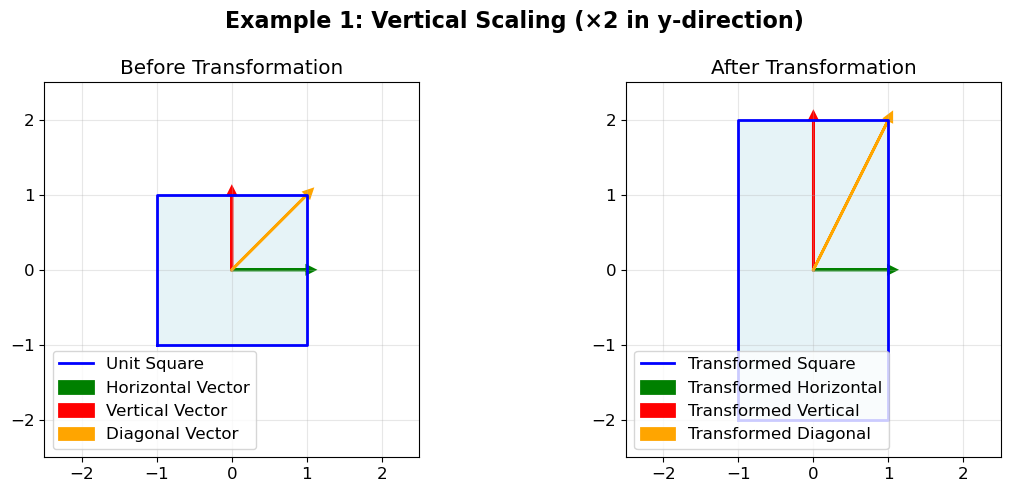

Analysis of transformation results:
Horizontal Vector:
  Original: [1.0, 0.0]
  Transformed: [1.0, 0.0]
  Direction changed: ✅ NO
  Length scaling: 1.0x
  🎯 This is an EIGENVECTOR with eigenvalue 1.0!

Vertical Vector:
  Original: [0.0, 1.0]
  Transformed: [0.0, 2.0]
  Direction changed: ✅ NO
  Length scaling: 2.0x
  🎯 This is an EIGENVECTOR with eigenvalue 2.0!

Diagonal Vector:
  Original: [1.0, 1.0]
  Transformed: [1.0, 2.0]
  Direction changed: ❌ YES
  Length scaling: 1.6x



In [10]:
# Example 1: Vertical Scaling by Factor of 2
# This matrix scales everything by 2 in the vertical direction

vertical_scaling = np.array([[1, 0],    # x-coordinate stays the same
                           [0, 2]])   # y-coordinate gets doubled

print("Vertical Scaling Matrix:")
print(vertical_scaling)
print()

# Let's see what happens to our vectors
transformed_vectors = plot_transformation(
    vertical_scaling, 
    "Example 1: Vertical Scaling (×2 in y-direction)"
)

# Analyze what happened to each vector
print("Analysis of transformation results:")
print("="*50)

original_vectors = {
    'Horizontal': np.array([[1], [0]]), 
    'Vertical': np.array([[0], [1]]), 
    'Diagonal': np.array([[1], [1]])
}

for name, original in original_vectors.items():
    transformed = transformed_vectors[name]
    
    # Check if direction changed (by looking at the ratio of components)
    if original[1,0] == 0:  # horizontal vector
        direction_changed = transformed[1,0] != 0
    elif original[0,0] == 0:  # vertical vector  
        direction_changed = transformed[0,0] != 0
    else:  # diagonal vector
        original_ratio = original[1,0] / original[0,0]
        transformed_ratio = transformed[1,0] / transformed[0,0]
        direction_changed = abs(original_ratio - transformed_ratio) > 1e-10
    
    # Calculate length change
    original_length = np.linalg.norm(original)
    transformed_length = np.linalg.norm(transformed)
    scale_factor = transformed_length / original_length
    
    print(f"{name} Vector:")
    print(f"  Original: [{original[0,0]:.1f}, {original[1,0]:.1f}]")
    print(f"  Transformed: [{transformed[0,0]:.1f}, {transformed[1,0]:.1f}]")
    print(f"  Direction changed: {'❌ YES' if direction_changed else '✅ NO'}")
    print(f"  Length scaling: {scale_factor:.1f}x")
    if not direction_changed:
        print(f"  🎯 This is an EIGENVECTOR with eigenvalue {scale_factor:.1f}!")
    print()

### 🎯 Key Observations from Vertical Scaling

From the vertical scaling example above, we can see:

1. **Horizontal vector** `[1, 0]`:
   - ✅ **Stays horizontal** (direction unchanged)
   - ✅ **Length unchanged** (eigenvalue = 1)
   - 🎯 **This is an eigenvector!**

2. **Vertical vector** `[0, 1]`:
   - ✅ **Stays vertical** (direction unchanged)  
   - ✅ **Length doubled** (eigenvalue = 2)
   - 🎯 **This is an eigenvector!**

3. **Diagonal vector** `[1, 1]`:
   - ❌ **Direction changed** (no longer 45°)
   - ❌ **Not an eigenvector**

**Mathematical insight**: For this transformation matrix $\begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix}$:
- Eigenvector $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ has eigenvalue $\lambda_1 = 1$
- Eigenvector $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ has eigenvalue $\lambda_2 = 2$

Shear Transformation Matrix:
[[1 1]
 [0 1]]



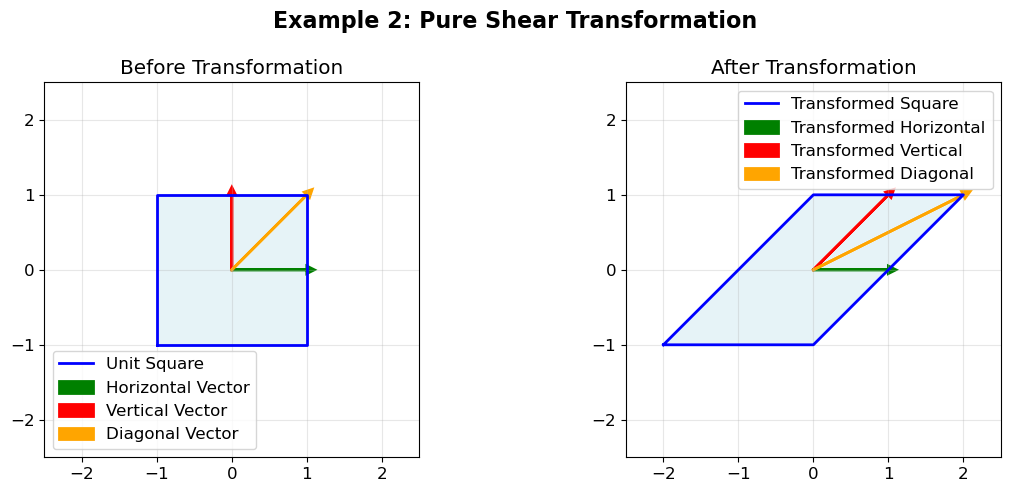

Analysis of shear transformation:
Horizontal Vector:
  Original: [1.0, 0.0]
  Transformed: [1.0, 0.0]
  Direction preserved: ✅ YES
  🎯 This is an EIGENVECTOR with eigenvalue 1.0!

Vertical Vector:
  Original: [0.0, 1.0]
  Transformed: [1.0, 1.0]
  Direction preserved: ❌ NO

Diagonal Vector:
  Original: [1.0, 1.0]
  Transformed: [2.0, 1.0]
  Direction preserved: ❌ NO



In [11]:
# Example 2: Pure Shear Transformation
# This matrix applies a horizontal shear while preserving area

shear_matrix = np.array([[1, 1],    # x becomes x + y
                        [0, 1]])    # y stays the same

print("Shear Transformation Matrix:")
print(shear_matrix)
print()

# Visualize the shear transformation
transformed_vectors_shear = plot_transformation(
    shear_matrix, 
    "Example 2: Pure Shear Transformation"
)

# Analyze the results
print("Analysis of shear transformation:")
print("="*50)

for name, original in original_vectors.items():
    transformed = transformed_vectors_shear[name]
    
    # For shear, check if the vector is still along the same line from origin
    # Two vectors are collinear if one is a scalar multiple of the other
    if abs(original[0,0]) < 1e-10:  # vertical vector
        direction_changed = abs(transformed[0,0]) > 1e-10
    elif abs(original[1,0]) < 1e-10:  # horizontal vector
        direction_changed = abs(transformed[1,0]) > 1e-10
    else:  # general case - check if cross product is zero (collinear)
        cross_product = original[0,0] * transformed[1,0] - original[1,0] * transformed[0,0]
        direction_changed = abs(cross_product) > 1e-10
    
    # Calculate scaling factor if it's an eigenvector
    if not direction_changed:
        if abs(original[0,0]) > 1e-10:
            scale_factor = transformed[0,0] / original[0,0]
        else:
            scale_factor = transformed[1,0] / original[1,0]
    else:
        scale_factor = np.linalg.norm(transformed) / np.linalg.norm(original)
    
    print(f"{name} Vector:")
    print(f"  Original: [{original[0,0]:.1f}, {original[1,0]:.1f}]")
    print(f"  Transformed: [{transformed[0,0]:.1f}, {transformed[1,0]:.1f}]")
    print(f"  Direction preserved: {'✅ YES' if not direction_changed else '❌ NO'}")
    if not direction_changed:
        print(f"  🎯 This is an EIGENVECTOR with eigenvalue {scale_factor:.1f}!")
    print()

Rotation Matrix (45° counterclockwise):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]



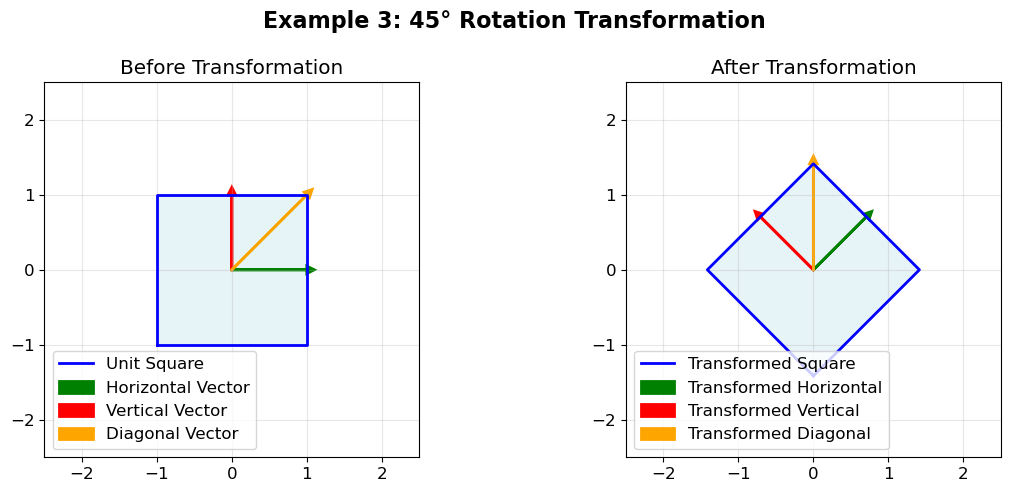

Analysis of rotation transformation:
Horizontal Vector:
  Original: [1.0, 0.0]
  Transformed: [0.707, 0.707]
  Direction preserved: ❌ NO

Vertical Vector:
  Original: [0.0, 1.0]
  Transformed: [-0.707, 0.707]
  Direction preserved: ❌ NO

Diagonal Vector:
  Original: [1.0, 1.0]
  Transformed: [0.000, 1.414]
  Direction preserved: ❌ NO

🔍 Key Insight: Pure rotations in 2D have NO real eigenvectors!
   All vectors change direction when rotated.


In [12]:
# Example 3: Rotation Transformation
# This matrix rotates vectors by 45 degrees counterclockwise

angle = np.pi/4  # 45 degrees in radians
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                           [np.sin(angle),  np.cos(angle)]])

print("Rotation Matrix (45° counterclockwise):")
print(rotation_matrix)
print()

# Visualize the rotation
transformed_vectors_rotation = plot_transformation(
    rotation_matrix, 
    "Example 3: 45° Rotation Transformation"
)

# Analyze the results
print("Analysis of rotation transformation:")
print("="*50)

for name, original in original_vectors.items():
    transformed = transformed_vectors_rotation[name]
    
    # Check if vectors are collinear (same direction)
    if abs(original[0,0]) < 1e-10:  # vertical vector
        direction_changed = abs(transformed[0,0]) > 1e-10
    elif abs(original[1,0]) < 1e-10:  # horizontal vector
        direction_changed = abs(transformed[1,0]) > 1e-10
    else:  # general case
        cross_product = original[0,0] * transformed[1,0] - original[1,0] * transformed[0,0]
        direction_changed = abs(cross_product) > 1e-10
    
    print(f"{name} Vector:")
    print(f"  Original: [{original[0,0]:.1f}, {original[1,0]:.1f}]")
    print(f"  Transformed: [{transformed[0,0]:.3f}, {transformed[1,0]:.3f}]")
    print(f"  Direction preserved: {'✅ YES' if not direction_changed else '❌ NO'}")
    if not direction_changed:
        print(f"  🎯 This would be an EIGENVECTOR!")
    print()

print("🔍 Key Insight: Pure rotations in 2D have NO real eigenvectors!")
print("   All vectors change direction when rotated.")

## Mathematical Definition

Now that we've seen eigenvectors in action, let's formalize the concept mathematically.

### The Eigenvalue Equation

For a square matrix $A$, a non-zero vector $\mathbf{v}$ is an **eigenvector** if there exists a scalar $\lambda$ (called the **eigenvalue**) such that:

$$A\mathbf{v} = \lambda\mathbf{v}$$

This equation tells us:
- **Left side**: What happens when we apply transformation $A$ to vector $\mathbf{v}$
- **Right side**: The same as scaling vector $\mathbf{v}$ by factor $\lambda$
- **Meaning**: The transformation acts like simple scaling along the eigenvector direction!

### Key Properties

1. **Eigenvectors maintain direction**: They lie on the same line through the origin
2. **Eigenvalues indicate scaling**:
   - $\lambda > 1$: Vector gets longer
   - $0 < \lambda < 1$: Vector gets shorter  
   - $\lambda = 1$: Vector length unchanged
   - $\lambda < 0$: Vector flips direction
   - $\lambda = 0$: Vector becomes zero (degenerate case)

3. **Not all matrices have real eigenvectors**: Rotations in 2D are a classic example

In [13]:
# Let's verify our examples using NumPy's eigenvalue computation
print("🔬 Computational Verification of Our Examples")
print("="*60)

def analyze_eigenvalues(matrix, name):
    """Compute and display eigenvalues and eigenvectors"""
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    print(f"\n{name}:")
    print(f"Matrix:\n{matrix}")
    print(f"\nEigenvalues: {eigenvalues}")
    print(f"Eigenvectors:")
    for i, (val, vec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        print(f"  λ_{i+1} = {val:.3f}, v_{i+1} = [{vec[0]:.3f}, {vec[1]:.3f}]")
        
        # Verify the eigenvalue equation: Av = λv
        Av = matrix @ vec
        lambda_v = val * vec
        verification = np.allclose(Av, lambda_v)
        print(f"    Verification Av = λv: {'✅' if verification else '❌'}")
    
    return eigenvalues, eigenvectors

# Analyze our three examples
analyze_eigenvalues(vertical_scaling, "1. Vertical Scaling")
analyze_eigenvalues(shear_matrix, "2. Pure Shear") 
analyze_eigenvalues(rotation_matrix, "3. Rotation (45°)")

🔬 Computational Verification of Our Examples

1. Vertical Scaling:
Matrix:
[[1 0]
 [0 2]]

Eigenvalues: [1. 2.]
Eigenvectors:
  λ_1 = 1.000, v_1 = [1.000, 0.000]
    Verification Av = λv: ✅
  λ_2 = 2.000, v_2 = [0.000, 1.000]
    Verification Av = λv: ✅

2. Pure Shear:
Matrix:
[[1 1]
 [0 1]]

Eigenvalues: [1. 1.]
Eigenvectors:
  λ_1 = 1.000, v_1 = [1.000, 0.000]
    Verification Av = λv: ✅
  λ_2 = 1.000, v_2 = [-1.000, 0.000]
    Verification Av = λv: ✅

3. Rotation (45°):
Matrix:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvalues: [0.70710678+0.70710678j 0.70710678-0.70710678j]
Eigenvectors:
  λ_1 = 0.707+0.707j, v_1 = [0.707+0.000j, 0.000-0.707j]
    Verification Av = λv: ✅
  λ_2 = 0.707-0.707j, v_2 = [0.707-0.000j, 0.000+0.707j]
    Verification Av = λv: ✅


(array([0.70710678+0.70710678j, 0.70710678-0.70710678j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

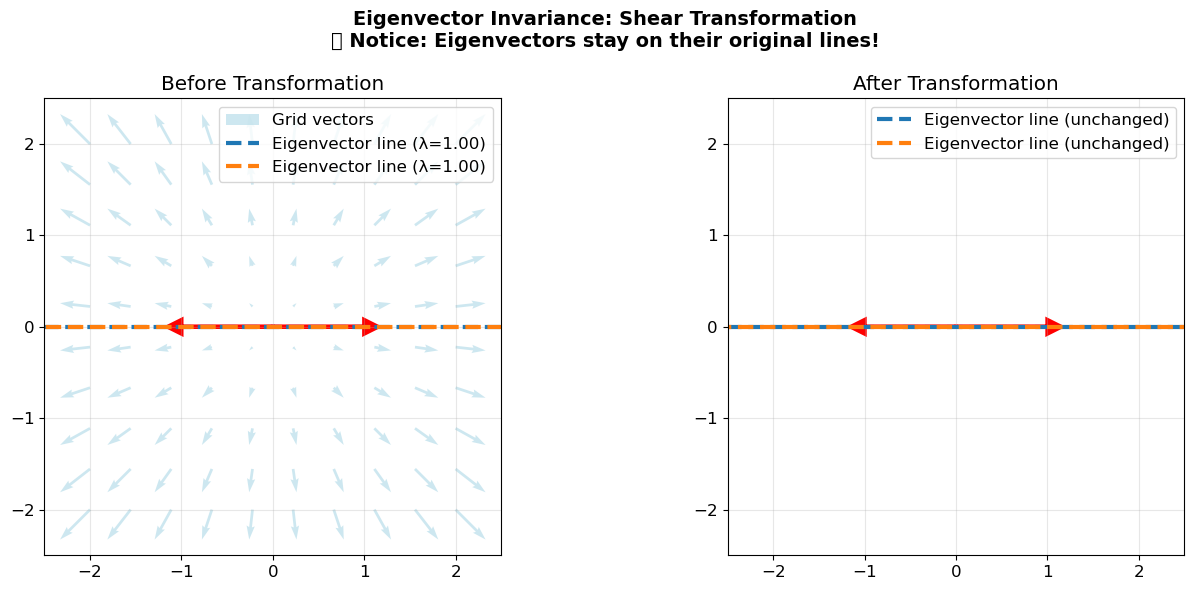

In [14]:
# Interactive Visualization: See how eigenvectors remain on their lines
def plot_eigenvector_invariance(matrix, title):
    """Show how eigenvectors stay on their span while other vectors move"""
    
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Generate a grid of vectors
    x = np.linspace(-2, 2, 10)
    y = np.linspace(-2, 2, 10)
    X, Y = np.meshgrid(x, y)
    
    # Original vectors
    ax1.quiver(X, Y, X, Y, alpha=0.6, color='lightblue', label='Grid vectors')
    
    # Plot eigenvector lines (extended)
    for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        if np.isreal(eigenval):  # Only plot real eigenvectors
            # Extend the line through the eigenvector
            t = np.linspace(-3, 3, 100)
            line_x = t * eigenvec[0]
            line_y = t * eigenvec[1]
            
            ax1.plot(line_x, line_y, '--', linewidth=3, 
                    label=f'Eigenvector line (λ={eigenval:.2f})')
            
            # Plot the actual eigenvector
            ax1.arrow(0, 0, eigenvec[0], eigenvec[1], 
                     head_width=0.15, head_length=0.15, 
                     fc='red', ec='red', linewidth=3)
    
    ax1.set_xlim(-2.5, 2.5)
    ax1.set_ylim(-2.5, 2.5)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    ax1.set_title('Before Transformation')
    ax1.legend()
    
    # Transformed vectors
    XY_transformed = matrix @ np.array([X.flatten(), Y.flatten()])
    X_trans = XY_transformed[0].reshape(X.shape)
    Y_trans = XY_transformed[1].reshape(Y.shape)
    
    ax2.quiver(X_trans, Y_trans, np.zeros_like(X_trans), np.zeros_like(Y_trans), 
              alpha=0.6, color='lightblue')
    
    # Plot transformed eigenvector lines and vectors
    for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        if np.isreal(eigenval):
            # The eigenvector line should be the same after transformation
            t = np.linspace(-3, 3, 100)
            line_x = t * eigenvec[0]
            line_y = t * eigenvec[1]
            
            ax2.plot(line_x, line_y, '--', linewidth=3,
                    label=f'Eigenvector line (unchanged)')
            
            # Plot the transformed eigenvector (should be on the same line)
            transformed_eigenvec = matrix @ eigenvec
            ax2.arrow(0, 0, transformed_eigenvec[0], transformed_eigenvec[1], 
                     head_width=0.15, head_length=0.15, 
                     fc='red', ec='red', linewidth=3)
    
    ax2.set_xlim(-2.5, 2.5)
    ax2.set_ylim(-2.5, 2.5)
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    ax2.set_title('After Transformation')
    ax2.legend()
    
    plt.suptitle(f'{title}\n🎯 Notice: Eigenvectors stay on their original lines!', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Demonstrate with our shear example
plot_eigenvector_invariance(shear_matrix, "Eigenvector Invariance: Shear Transformation")

## 🎯 Key Takeaways

### What are Eigenvectors and Eigenvalues?

**Eigenvectors** are special vectors that **maintain their direction** when a linear transformation is applied. They might change in length or flip direction, but they stay on the same line through the origin.

**Eigenvalues** tell us **how much** the eigenvector's length changes:
- $\lambda > 1$: Vector gets longer
- $0 < \lambda < 1$: Vector gets shorter
- $\lambda = 1$: Vector stays the same length
- $\lambda = 0$: Vector becomes zero
- $\lambda < 0$: Vector flips direction

### The Fundamental Equation

$$A\mathbf{v} = \lambda\mathbf{v}$$

This says: "Applying transformation $A$ to eigenvector $\mathbf{v}$ is the same as scaling $\mathbf{v}$ by eigenvalue $\lambda$"

### Examples We Explored

1. **Vertical Scaling** $\begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix}$:
   - Horizontal eigenvector: $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ with $\lambda = 1$
   - Vertical eigenvector: $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ with $\lambda = 2$

2. **Pure Shear** $\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$:
   - Only horizontal eigenvector: $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ with $\lambda = 1$

3. **Rotation**: 
   - No real eigenvectors (all vectors change direction)

### Why This Matters

Eigenvectors reveal the **characteristic directions** of a transformation - the directions that are somehow "natural" or "preferred" by the transformation. This concept is fundamental in:

- **Principal Component Analysis (PCA)**: Finding the main directions of variation in data
- **Stability Analysis**: Understanding system behavior
- **Google's PageRank**: Ranking web pages
- **Quantum Mechanics**: Energy states
- **Computer Graphics**: Efficient transformations

The geometric intuition we've built here extends to higher dimensions and forms the foundation for many advanced topics in linear algebra and machine learning!

In [17]:
# 🧪 Practice Exercise: Test Your Understanding!

def practice_exercise():
    """
    Try to predict the eigenvectors and eigenvalues for this matrix before running the code!
    """
    
    # Mystery matrix - can you predict its eigenvectors?
    mystery_matrix = np.array([[3, 0],
                              [0, -1]])
    
    print("🧩 CHALLENGE: Analyze this matrix before running the solution!")
    print("Matrix:")
    print(mystery_matrix)
    print()
    print("Questions to think about:")
    print("1. What transformation does this matrix represent?")
    print("2. Which vectors will be eigenvectors?") 
    print("3. What will their eigenvalues be?")
    print("4. Try to sketch what happens to a unit square!")
    print()
    print("Uncomment the lines below to see the answer...")
    
    # Uncomment these lines to see the solution:
    # plot_transformation(mystery_matrix, "Practice Exercise: Mystery Transformation")
    # analyze_eigenvalues(mystery_matrix, "Mystery Matrix")

practice_exercise()

🧩 CHALLENGE: Analyze this matrix before running the solution!
Matrix:
[[ 3  0]
 [ 0 -1]]

Questions to think about:
1. What transformation does this matrix represent?
2. Which vectors will be eigenvectors?
3. What will their eigenvalues be?
4. Try to sketch what happens to a unit square!

Uncomment the lines below to see the answer...
